## Observations and Insights

## Dependencies and starter code

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_metadata_pd = pd.DataFrame(mouse_metadata)
study_results_pd = pd.DataFrame(study_results)
study_results_pd

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [2]:
# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata_pd, study_results_pd, how='left', left_on='Mouse ID', right_on='Mouse ID')
merged_df.head()
merged_df.to_csv("file_name", encoding='utf-8', index=False)

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_size = merged_df['Tumor Volume (mm3)']
tumor_mean = np.mean(tumor_size)
tumor_median = np.median(tumor_size)
tumor_var = np.var(tumor_size,ddof = 0)
print(f"The population variance using the NumPy module is {tumor_var}")

tumor_sd = np.std(tumor_size,ddof = 0)
print(f"The population standard deviation using the NumPy module is {tumor_sd}")

tumor_SEM = merged_df['Tumor Volume (mm3)'].sem()
print(tumor_SEM)



The population variance using the NumPy module is 79.07427999025795
The population standard deviation using the NumPy module is 8.892372011463417
0.20443585034961495


In [4]:
summary_table = pd.DataFrame({'Tumor Mean': [tumor_mean], 'Tumor Median': [tumor_median], 'Tumor Variance': [tumor_var], 'Tumor SEM': [tumor_SEM]})
print(summary_table)
summary_table.head()

   Tumor Mean  Tumor Median  Tumor Variance  Tumor SEM
0   50.448381     48.951474        79.07428   0.204436


,Tumor Mean,Tumor Median,Tumor Variance,Tumor SEM
0,50.448381,48.951474,79.07428,0.204436


## Bar plots

In [5]:
regimen_table = merged_df.groupby(['Drug Regimen'])
print(regimen_table)
regimen_table.count().head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


In [6]:
regimen_names = []
regimen_names = regimen_table['Drug Regimen'].unique()
regimen_names



Drug Regimen
Capomulin    [Capomulin]
Ceftamin      [Ceftamin]
Infubinol    [Infubinol]
Ketapril      [Ketapril]
Naftisol      [Naftisol]
Placebo        [Placebo]
Propriva      [Propriva]
Ramicane      [Ramicane]
Stelasyn      [Stelasyn]
Zoniferol    [Zoniferol]
Name: Drug Regimen, dtype: object

In [7]:
data_points = regimen_table['Mouse ID'].count()
data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [8]:
regimen_summary = pd.DataFrame({'Drug Regimen': regimen_names, 'Total Data Points': data_points})
print(regimen_summary)
regimen_summary.head()

             Drug Regimen  Total Data Points
Drug Regimen                                
Capomulin     [Capomulin]                230
Ceftamin       [Ceftamin]                178
Infubinol     [Infubinol]                178
Ketapril       [Ketapril]                188
Naftisol       [Naftisol]                186
Placebo         [Placebo]                181
Propriva       [Propriva]                161
Ramicane       [Ramicane]                228
Stelasyn       [Stelasyn]                181
Zoniferol     [Zoniferol]                182


,Drug Regimen,Total Data Points
Drug Regimen,,
Capomulin,[Capomulin],230
Ceftamin,[Ceftamin],178
Infubinol,[Infubinol],178
Ketapril,[Ketapril],188
Naftisol,[Naftisol],186


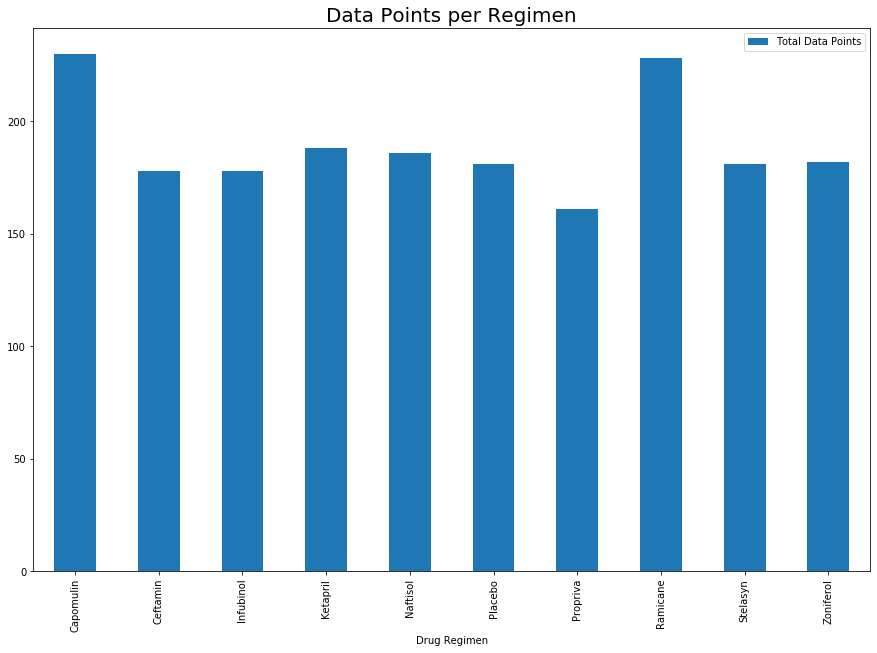

In [81]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
x_axis = np.arange(len(regimen_names))

tick_locations = [value for value in x_axis]
regimen_summary.plot(kind="bar", figsize=(15,10))

plt.title("Data Points per Regimen", fontsize=20)

plt.show()


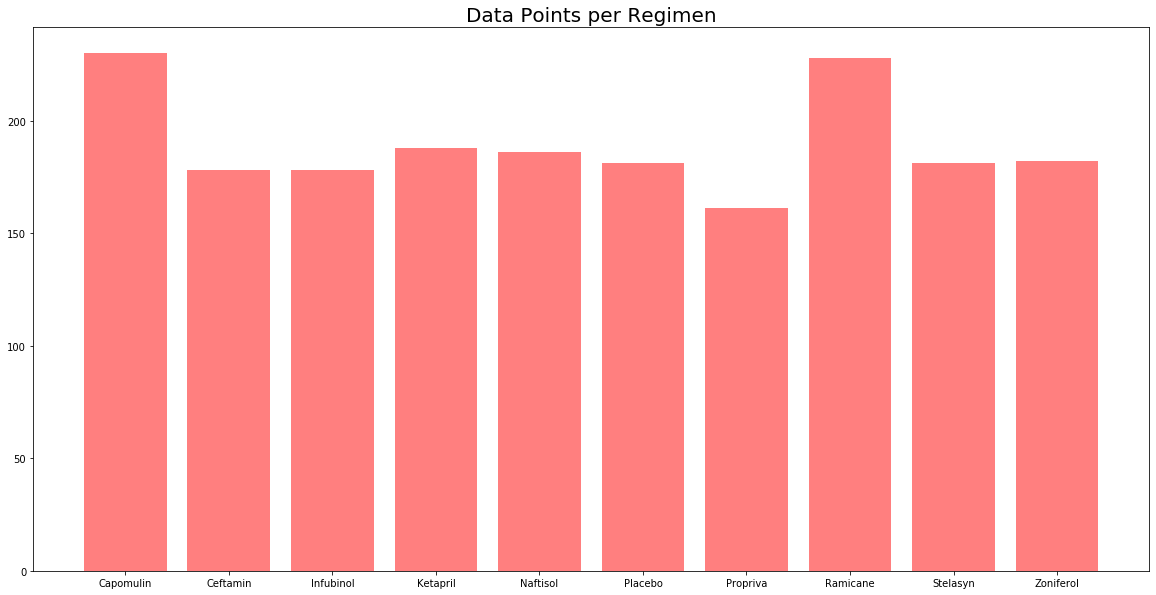

In [84]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis2 = np.arange(len(regimen_names))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,10))
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'])
plt.bar(x_axis2, data_points, color='r', alpha=0.5, align='center')
plt.title("Data Points per Regimen", fontsize=20)
plt.show()


## Pie plots

In [11]:
gender_summary = merged_df.groupby(['Sex'])
print(gender_summary)
gender_summary.count().head()

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


In [12]:
ratio = gender_summary['Mouse ID'].count()
ratio

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

In [13]:
gender_ratios = pd.DataFrame({'Gender': gender_summary['Sex'].unique(), 'Ratio': ratio})
print(gender_ratios)
gender_ratios.count().head()

          Gender  Ratio
Sex                    
Female  [Female]    935
Male      [Male]    958


Gender    2
Ratio     2
dtype: int64

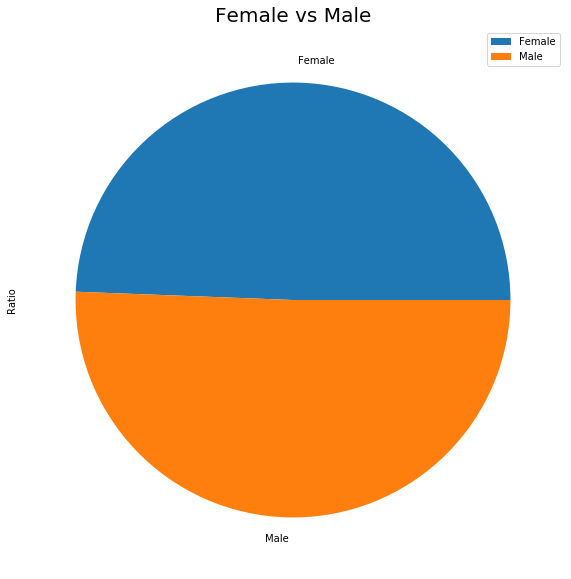

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


gender_ratios.plot.pie(y='Ratio', figsize=(15,10))
plt.title("Female vs Male", fontsize=20)

plt.show()


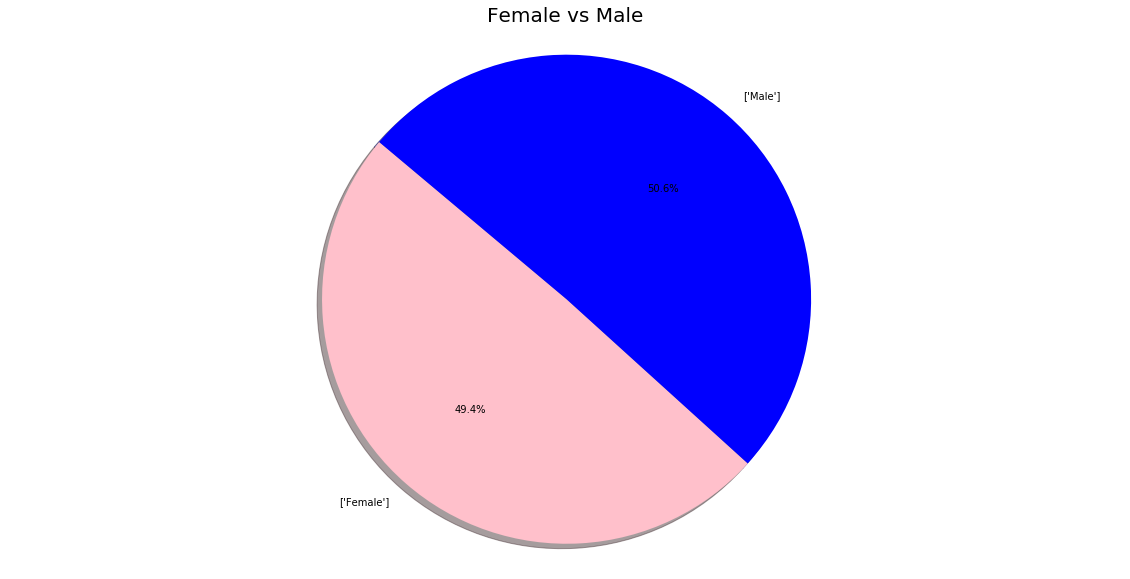

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_ratios_py = gender_ratios

sizes = gender_ratios_py['Ratio'].unique()

colors = ["pink", "blue",]

labels2 = gender_ratios_py['Gender']

plt.figure(figsize=(20,10))
plt.pie(sizes, labels=labels2, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Female vs Male", fontsize=20)

plt.show()

## Quartiles, outliers and boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumor_change_df = merged_df.set_index('Mouse ID')
tumor_end = tumor_change_df.loc[(tumor_change_df['Timepoint'] == 45) | (
    tumor_change_df['Timepoint'] == 0), :]
tumor_end




,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,45,22.050126,1
s185,Capomulin,Female,3,17,0,45.000000,0
s185,Capomulin,Female,3,17,45,23.343598,1
x401,Capomulin,Female,16,15,0,45.000000,0
...,...,...,...,...,...,...,...
z581,Infubinol,Female,24,25,45,62.754451,3
z795,Naftisol,Female,13,29,0,45.000000,0
z795,Naftisol,Female,13,29,45,65.741070,3


In [47]:
tumor_start = tumor_end.loc[(tumor_end['Timepoint'] == 0), :]
tumor_start

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.0,0
s185,Capomulin,Female,3,17,0,45.0,0
x401,Capomulin,Female,16,15,0,45.0,0
m601,Capomulin,Male,22,17,0,45.0,0
g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...
z314,Stelasyn,Female,21,28,0,45.0,0
z435,Propriva,Female,12,26,0,45.0,0
z581,Infubinol,Female,24,25,0,45.0,0


In [48]:
tumor_final = tumor_end.loc[(tumor_end['Timepoint'] == 45), :]
tumor_final

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,45,22.050126,1
s185,Capomulin,Female,3,17,45,23.343598,1
x401,Capomulin,Female,16,15,45,28.484033,0
m601,Capomulin,Male,22,17,45,28.430964,1
g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4
y865,Ceftamin,Male,23,26,45,64.729837,3
z581,Infubinol,Female,24,25,45,62.754451,3


In [49]:
tumor_merged_df = pd.merge(tumor_start, tumor_final, how='left', left_on='Mouse ID', right_on='Mouse ID')
tumor_merged_df.head()

,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y
Mouse ID,,,,,,,,,,,,,,
k403,Ramicane,Male,21,16,0,45.0,0,Ramicane,Male,21.0,16.0,45.0,22.050126,1.0
s185,Capomulin,Female,3,17,0,45.0,0,Capomulin,Female,3.0,17.0,45.0,23.343598,1.0
x401,Capomulin,Female,16,15,0,45.0,0,Capomulin,Female,16.0,15.0,45.0,28.484033,0.0
m601,Capomulin,Male,22,17,0,45.0,0,Capomulin,Male,22.0,17.0,45.0,28.430964,1.0
g791,Ramicane,Male,11,16,0,45.0,0,Ramicane,Male,11.0,16.0,45.0,29.128472,1.0


In [50]:
tumor_final_size = tumor_merged_df['Tumor Volume (mm3)_x'] - tumor_merged_df['Tumor Volume (mm3)_y']
tumor_final_size

Mouse ID
k403    22.949874
s185    21.656402
x401    16.515967
m601    16.569036
g791    15.871528
          ...    
z314          NaN
z435          NaN
z581   -17.754451
z795   -20.741070
z969   -28.867845
Length: 250, dtype: float64

In [51]:
tumor_summary = pd.DataFrame({'Drug': tumor_merged_df['Drug Regimen_x'], 'Tumor Size (final)': tumor_final_size})
print(tumor_summary)
tumor_summary.head()

               Drug  Tumor Size (final)
Mouse ID                               
k403       Ramicane           22.949874
s185      Capomulin           21.656402
x401      Capomulin           16.515967
m601      Capomulin           16.569036
g791       Ramicane           15.871528
...             ...                 ...
z314       Stelasyn                 NaN
z435       Propriva                 NaN
z581      Infubinol          -17.754451
z795       Naftisol          -20.741070
z969       Naftisol          -28.867845

[250 rows x 2 columns]


,Drug,Tumor Size (final)
Mouse ID,,
k403,Ramicane,22.949874
s185,Capomulin,21.656402
x401,Capomulin,16.515967
m601,Capomulin,16.569036
g791,Ramicane,15.871528


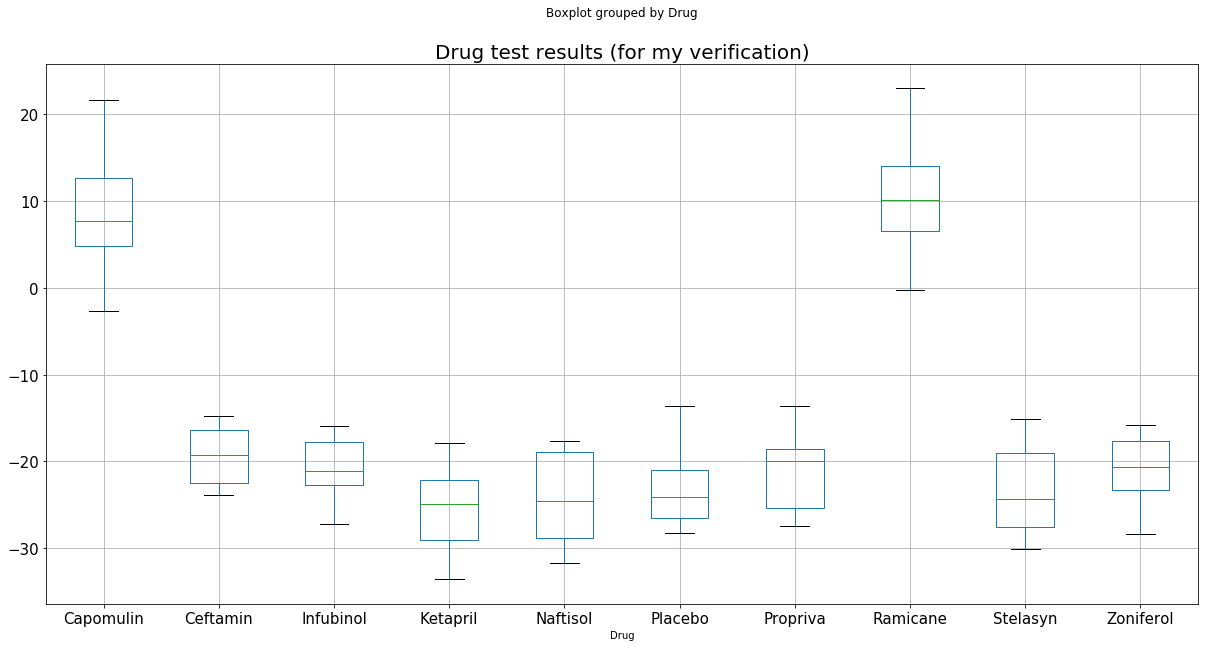

<Figure size 432x288 with 0 Axes>

In [87]:


tumor_summary.boxplot(column='Tumor Size (final)', by='Drug', figsize=(20,10), fontsize=15)
plt.title('Drug test results (for my verification)', fontsize=20)
plt.show()
plt.tight_layout()

In [23]:
quartiles = tumor_final_size.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor size change is: {lowerq}")
print(f"The upper quartile of tumor size change is: {upperq}")
print(f"The interquartile range of tumor size change is: {iqr}")
print(f"The the median of tumor size change is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumor size change is: -23.870295977500003
The upper quartile of tumor size change is: 4.341655687499999
The interquartile range of tumor size change is: 28.211951665
The the median of tumor size change is: -18.53754596 
Values below -66.188223475 could be outliers.
Values above 46.659583185 could be outliers.


In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
best_drugs = tumor_summary.loc[(tumor_summary['Drug'] == 'Ramicane') | (
    tumor_summary['Drug'] == 'Capomulin') | (
    tumor_summary['Drug'] == 'Propriva') | (
    tumor_summary['Drug'] == 'Ceftamin'), :]
best_drugs


,Drug,Tumor Size (final)
Mouse ID,,
k403,Ramicane,22.949874
s185,Capomulin,21.656402
x401,Capomulin,16.515967
m601,Capomulin,16.569036
g791,Ramicane,15.871528
...,...,...
x581,Ceftamin,-19.634949
x822,Ceftamin,-16.386660
y769,Ceftamin,-23.594745


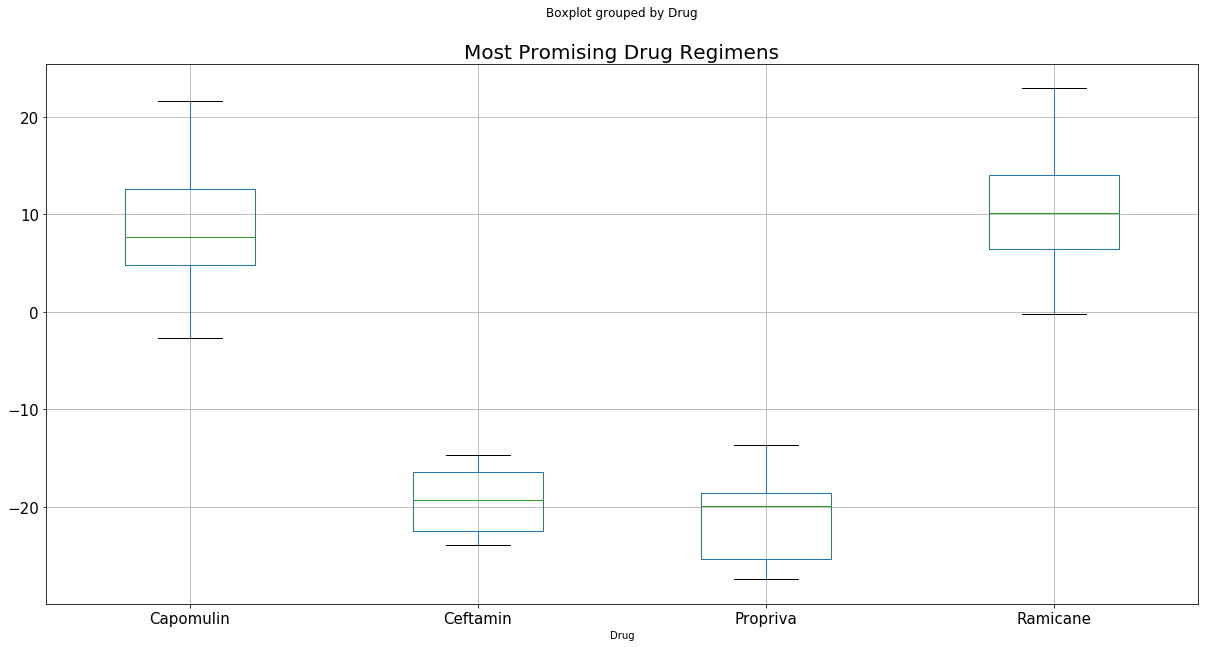

In [89]:
best_drugs.boxplot(column='Tumor Size (final)', by='Drug', figsize=(20,10), fontsize=15)
plt.title('Most Promising Drug Regimens', fontsize=20)
plt.show()


## Line and scatter plots

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']
capomulin_mouse = capomulin.loc[capomulin['Mouse ID'] == 's185']
capomulin_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


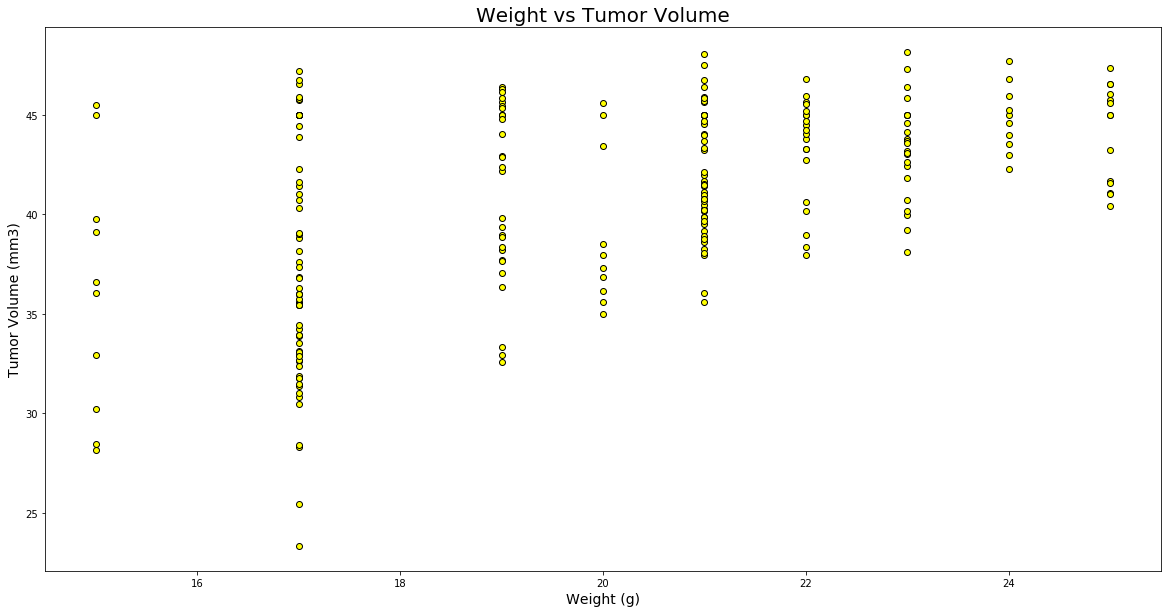

In [92]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight = capomulin['Weight (g)']
tumor_volume = capomulin['Tumor Volume (mm3)']

plt.figure(figsize=(20,10))
plt.scatter(weight, tumor_volume, marker="o", facecolors="yellow", edgecolors="black")
plt.title("Weight vs Tumor Volume", fontsize=20)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Tumor Volume (mm3)', fontsize=14)
plt.show()

In [28]:
correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.53


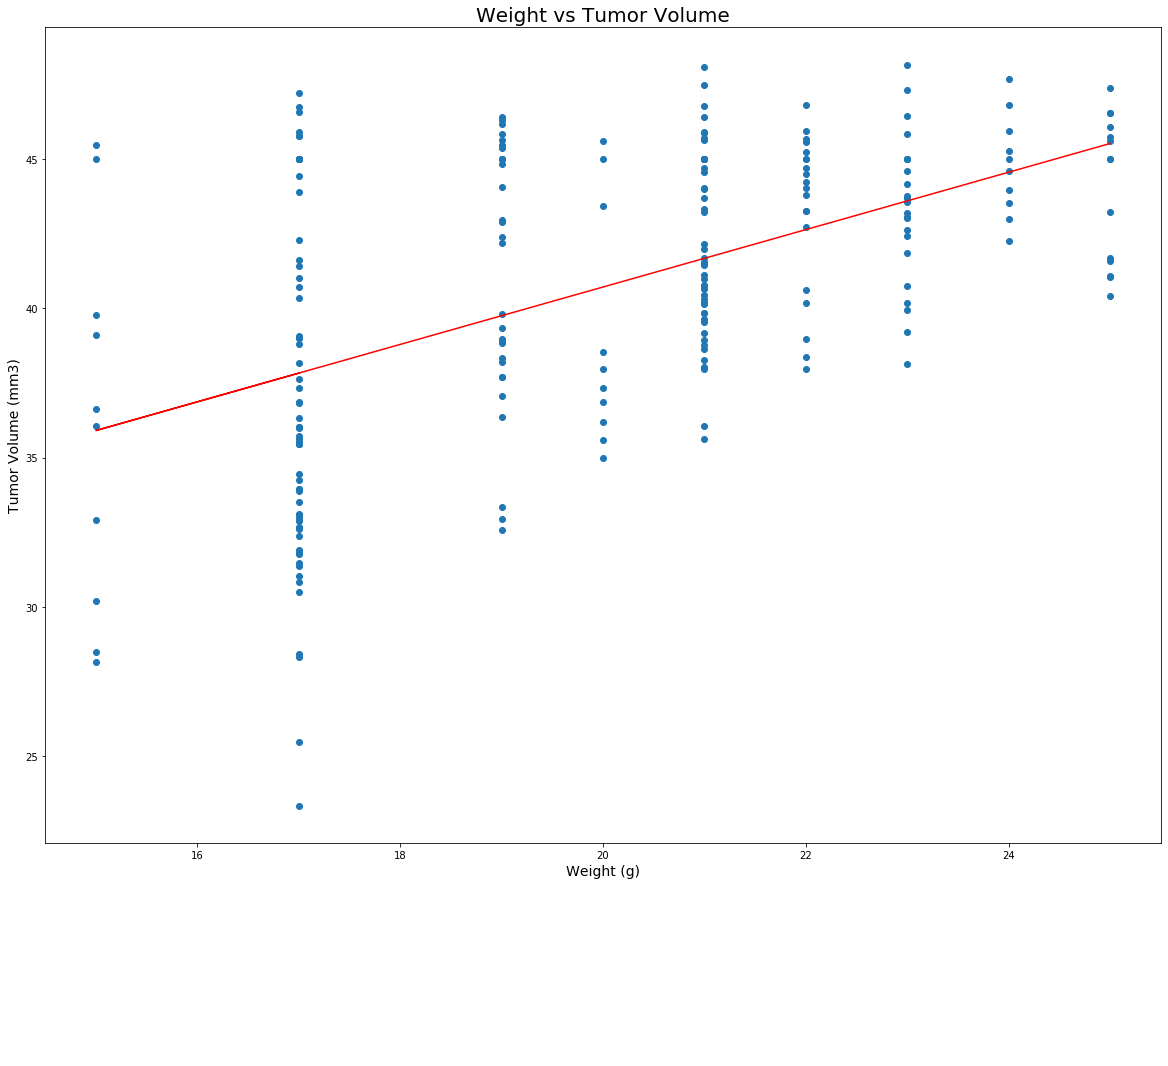

In [111]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = weight
y_values = tumor_volume

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.figure(figsize=(20,15))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=20,color="red")
plt.title("Weight vs Tumor Volume", fontsize=20)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Tumor Volume (mm3)', fontsize=14)
plt.show()
